f
<div style="direction:rtl;line-height:500%;text-align:justify;">
	<font face="B Zar", size=5px>
        <h2>هوش مصنوعی، پروژه MLP، تخمین خروجی تابع</h2>
        احمد سلیمی - ۹۷۱۰۶۰۱۳
    </font>
</div>

In [326]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [327]:
def plot(X, y_pred, y_test=None, xlim=None, ylim=None):
    plt.figure(figsize=(25, 15))
#     plt.plot(X, y, color='skyblue', label='original', linewidth=12, zorder=1)
    if y_test is not None:
        plt.scatter(X, y_test, color='skyblue', label='test', s=50, zorder=1)
    plt.scatter(X, y_pred, color='green', label='pred', s=30, zorder=2)
#     plt.plot(x, self.best_function.evaluate(x), color='red', label='predicted', linewidth=3, zorder=3)
    plt.grid()
    if xlim:
        plt.xlim(xlim)
    if ylim:
        plt.ylim(ylim)
    plt.legend()

In [328]:
def make_random_dataset(function, n_samples:int=1000, min_value=-100, max_value=100):
    X = np.random.uniform(min_value, max_value, (n_samples, 1))
    y = np.vectorize(function)(X).reshape(n_samples,)
    return X, y

In [329]:
function = lambda x: np.sin(x / 10)
X, y = make_random_dataset(function, n_samples=10000, min_value=-100, max_value=100)

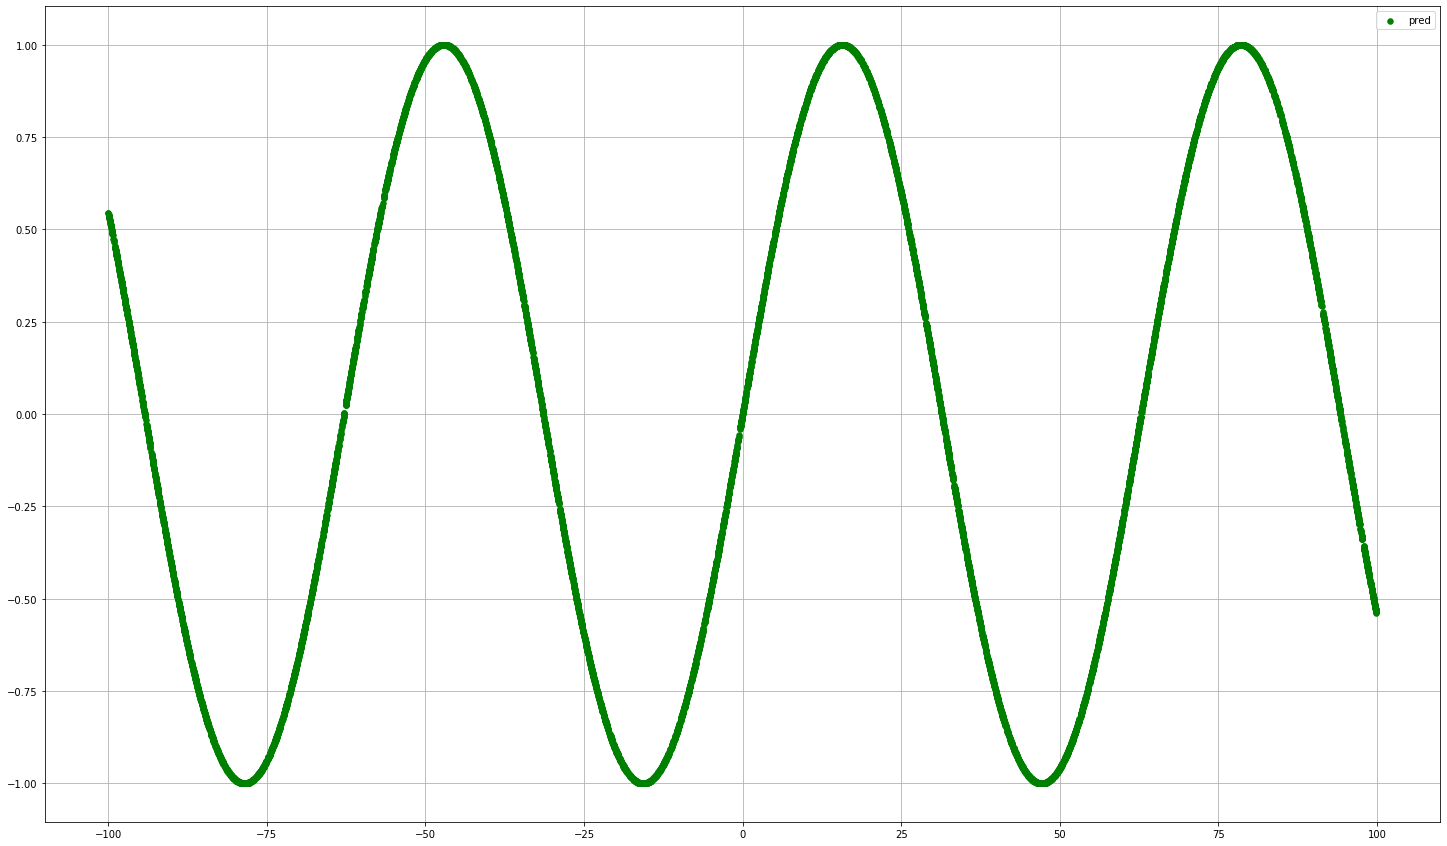

In [330]:
plot(X, y)

In [331]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(32, input_shape=[1], activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')

In [332]:
model.fit(X, y, batch_size=32, epochs=20, verbose=1, validation_split=0.2)

Train on 8000 samples, validate on 2000 samples
Epoch 1/20
8000/8000 [==============================] - 0s 51us/step - loss: 0.3778 - val_loss: 0.3323
Epoch 2/20
8000/8000 [==============================] - 0s 36us/step - loss: 0.3250 - val_loss: 0.3193
Epoch 3/20
8000/8000 [==============================] - 0s 55us/step - loss: 0.3007 - val_loss: 0.2702
Epoch 4/20
8000/8000 [==============================] - 0s 54us/step - loss: 0.2727 - val_loss: 0.2581
Epoch 5/20
8000/8000 [==============================] - 0s 44us/step - loss: 0.2520 - val_loss: 0.2329
Epoch 6/20
8000/8000 [==============================] - 0s 41us/step - loss: 0.2406 - val_loss: 0.2194
Epoch 7/20
8000/8000 [==============================] - 0s 45us/step - loss: 0.2347 - val_loss: 0.2154
Epoch 8/20
8000/8000 [==============================] - 0s 50us/step - loss: 0.2299 - val_loss: 0.2238
Epoch 9/20
8000/8000 [==============================] - 1s 64us/step - loss: 0.2254 - val_loss: 0.2116
Epoch 10/20
8000/8000 [==

In [333]:
X_test, y_test = make_random_dataset(function, min_value=-200, max_value=200)

In [334]:
y_pred = model.predict(X_test).reshape(1000,)

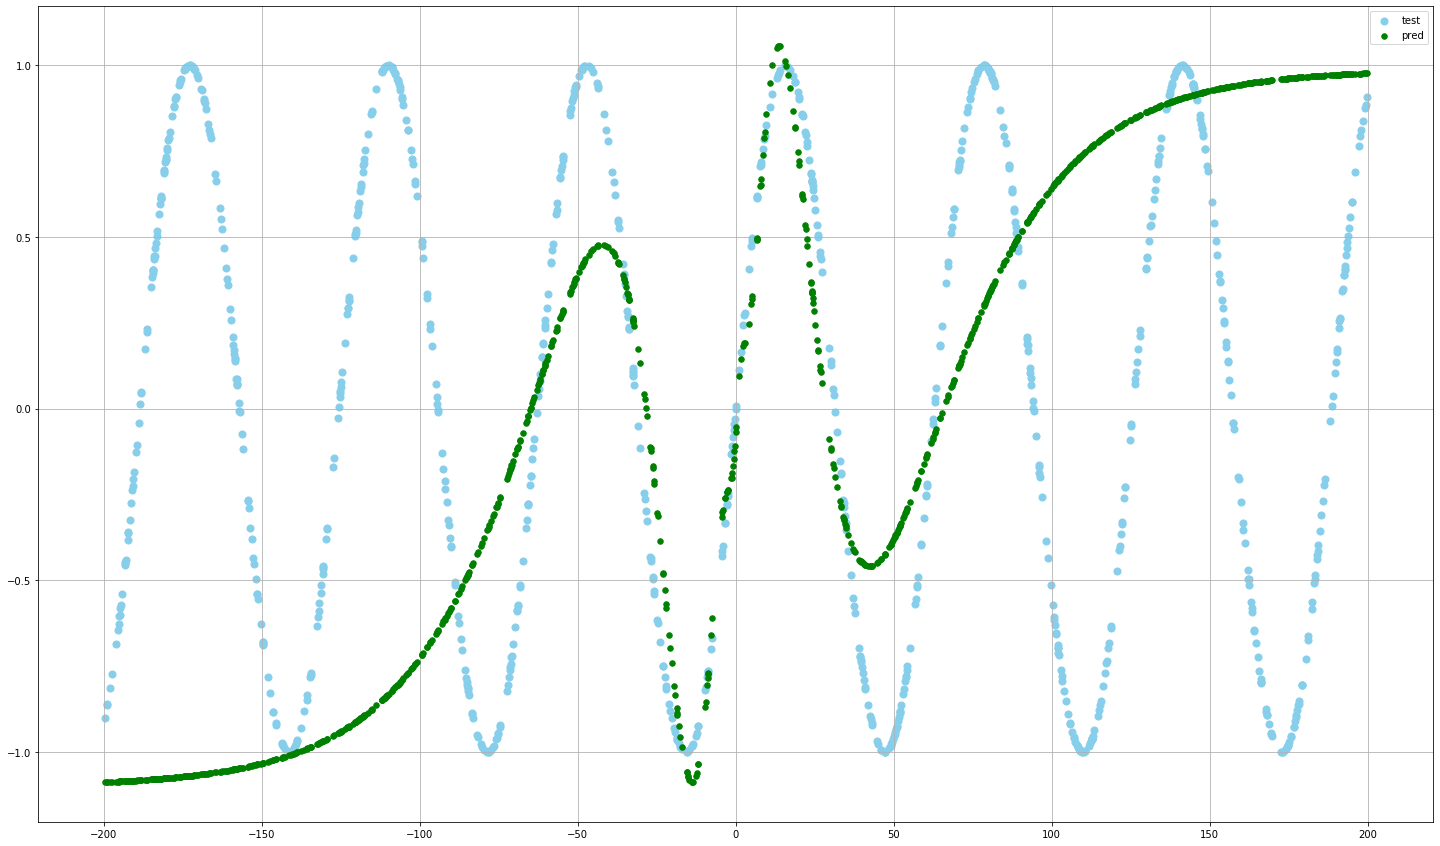

In [335]:
plot(X_test, y_pred, y_test)